In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Data Filtering**:
Extract the entries corresponding to your home state from the dataset. Ensure you accurately filter out only those pincodes that belong to your home state.


In [116]:
clustering_df = pd.read_csv("clustering_data.csv")
clustering_df

/tmp/ipykernel_706/4130439463.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  clustering_df = pd.read_csv("clustering_data.csv")


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477
...,...,...,...,...,...,...,...,...,...,...,...
157121,Uttar Pradesh Circle,Bareilly Region,Meerut Division,Rly Road Meerut SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.98,77.68
157122,Uttar Pradesh Circle,Bareilly Region,Meerut Division,SGMandi SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.9724,77.67536
157123,Uttar Pradesh Circle,Bareilly Region,Meerut Division,W K Road SO,250001,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.99,77.71
157124,Kerala Circle,Calicut Region,Calicut Division,Kakkoti SO,673611,PO,Delivery,KOZHIKODE,KERALA,11.24529,75.778455


In [117]:
clustering_df["RegionName"].unique()

array(['Kurnool Region', 'Vijayawada Region', 'East Region, Bhagalpur',
       'Visakhapatnam Region', 'Hyderabad Region', 'Jodhpur Region', nan,
       'DivReportingCircle', 'Kanpur Region', 'Gorakhpur Region',
       'Hyderabad City Region', 'Punjab West Region',
       'North Karnataka Region', 'Jabalpur Region', 'Nagpur Region',
       'Sambalpur Region', 'Muzaffarpur Region', 'Lucknow  HQ Region',
       'South Karnataka Region', 'Agra Region', 'Ahmedabad HQ Region',
       'Central Region, Trichirapalli', 'Ajmer Region', 'Kolkata Region',
       'Dibrugarh Region', 'Allahabad Region',
       'Western Region, Coimbatore', 'Chennai City Region',
       'Vadodara Region', 'Bareilly Region', 'Kochi Region',
       'Calicut Region', 'Rajkot Region', 'Varanasi Region',
       'North Eastern Region', 'Bengaluru HQ Region', 'Aurangabad Region',
       'Pune Region', 'Indore Region', 'Berhampur Region',
       'Shillong HQ Region', 'Srinagar HQ Region', 'Navi Mumbai Region',
       'Goa-P

The only region names corresponding to the state **Telangana** are **Hyderabad Region** and **Hyderabad City Region**

In [118]:
telangana_df = clustering_df[clustering_df["RegionName"].isin(["Hyderabad Region",
                                                               "Hyderabad City Region",
                                                               ])]

In [119]:
#checking number of NAN values in Latitude
telangana_df["Latitude"].isna().sum()

1535

In [120]:
#checking number of NAN values in longitude
telangana_df["Longitude"].isna().sum()

1535

In [121]:
telangana_df.dropna(inplace = True)

/tmp/ipykernel_706/3072051512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telangana_df.dropna(inplace = True)


In [122]:
telangana_df

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.6845544,78.0773742
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.3096558,77.9466324
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.2108201,78.4853495
...,...,...,...,...,...,...,...,...,...,...,...
150614,Telangana Circle,Hyderabad Region,Nalgonda Division,Valigonda S.O,508112,PO,Delivery,YADADRI BHUVANAGIRI,TELANGANA,17.377222,79.0245556
151046,Telangana Circle,Hyderabad City Region,Medak Division,Makkarajpet S.O,502247,PO,Delivery,MEDAK,TELANGANA,17.949361,78.5200556
151047,Telangana Circle,Hyderabad City Region,Medak Division,Rajpally S.O,502117,PO,Delivery,MEDAK,TELANGANA,18.019889,78.2949444
151048,Telangana Circle,Hyderabad City Region,Medak Division,Toopran S.O,502334,PO,Delivery,MEDAK,TELANGANA,17.905167,78.4610833


In [123]:
#converting the latitude and longitude arrays to numerical values
telangana_df['Latitude'] = pd.to_numeric(telangana_df['Latitude'], errors='coerce')
telangana_df['Longitude'] = pd.to_numeric(telangana_df['Longitude'], errors='coerce')
telangana_df.dropna(inplace = True)
telangana_df


/tmp/ipykernel_706/3809397359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telangana_df['Latitude'] = pd.to_numeric(telangana_df['Latitude'], errors='coerce')
/tmp/ipykernel_706/3809397359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telangana_df['Longitude'] = pd.to_numeric(telangana_df['Longitude'], errors='coerce')
/tmp/ipykernel_706/3809397359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.684554,78.077374
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.532992,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.532992,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.309656,77.946632
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.210820,78.485349
...,...,...,...,...,...,...,...,...,...,...,...
150614,Telangana Circle,Hyderabad Region,Nalgonda Division,Valigonda S.O,508112,PO,Delivery,YADADRI BHUVANAGIRI,TELANGANA,17.377222,79.024556
151046,Telangana Circle,Hyderabad City Region,Medak Division,Makkarajpet S.O,502247,PO,Delivery,MEDAK,TELANGANA,17.949361,78.520056
151047,Telangana Circle,Hyderabad City Region,Medak Division,Rajpally S.O,502117,PO,Delivery,MEDAK,TELANGANA,18.019889,78.294944
151048,Telangana Circle,Hyderabad City Region,Medak Division,Toopran S.O,502334,PO,Delivery,MEDAK,TELANGANA,17.905167,78.461083


In [124]:
latitudes = telangana_df["Latitude"].to_numpy()
longitudes = telangana_df["Longitude"].to_numpy()

In [125]:
print(telangana_df["Latitude"].dtypes)

float64


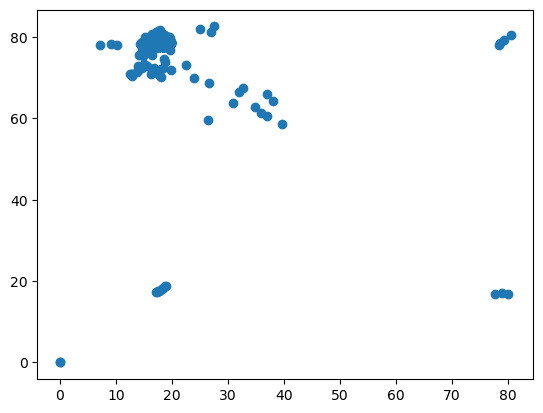

In [126]:
#Visualizing the data to identify outliers
plt.scatter(latitudes, longitudes)

I filtered out the points that exceed the limits of telangana using google maps

In [127]:
#limits
northern_limit = [19.888774, 78.321238]
southern_limit = [16.030649, 78.152414]
eastern_limit = [17.897977, 80.820099]
western_limit = [18.030339, 77.746985]

In [128]:
max_latitude = northern_limit[0]
min_latitude = southern_limit[0]
max_longitude = eastern_limit[1]
min_longitude = western_limit[1]

In [129]:
tg_df = telangana_df[telangana_df["Latitude"].between(min_latitude, max_latitude) &
                         telangana_df["Longitude"].between(min_longitude, max_longitude)]

In [130]:
latitudes

array([18.6845544, 18.5329923, 18.5329923, ..., 18.0198889, 17.9051667,
       18.04325  ])

In [131]:
latitudes = tg_df["Latitude"].to_numpy()
longitudes = tg_df["Longitude"].to_numpy()

Scaling the `latitudes` and `longitudes` arrays using **min max scaling**

In [132]:
latitudes_scaled = (latitudes - min(latitudes))/(max(latitudes) - min(latitudes))
longitudes_scaled = (longitudes - min(longitudes))/(max(longitudes) - min(longitudes))

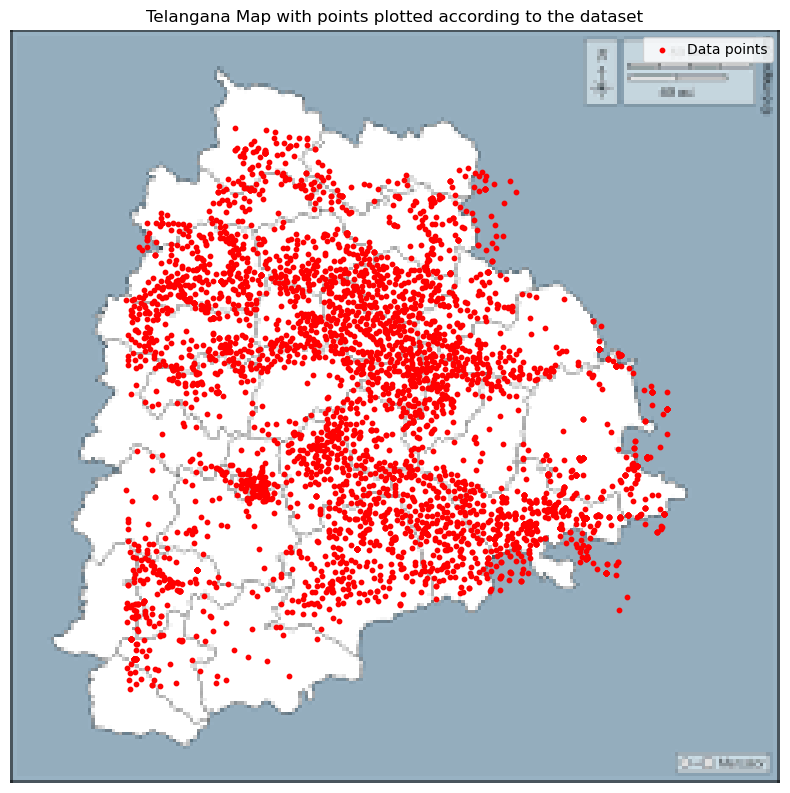

In [163]:
# Load the image
img = plt.imread("telangana.png")


edges = 0.65

lat_min, lat_max = min(latitudes)-edges, max(latitudes)+edges
lon_min, lon_max = min(longitudes)-edges, max(longitudes)+edges

# Image dimensions
height, width, _ = img.shape

# Function to convert lat/lon to pixel positions
def latlon_to_pixel(lat, lon):
    x = (lon - lon_min) / (lon_max - lon_min) * width
    y = height - (lat - lat_min) / (lat_max - lat_min) * height
    return x, y



# Convert to pixel coordinates
x_pixels, y_pixels = latlon_to_pixel(latitudes, longitudes)

# Plot the map
fig, ax = plt.subplots(figsize=(8, 10))
ax.imshow(img)


ax.scatter(x_pixels, y_pixels, c='red', s=10, label='Data points')
ax.axis('off')
ax.legend()

plt.tight_layout()
plt.title("Telangana Map with points plotted according to the dataset")
plt.savefig("../figs/Telangana_map.png")
plt.show()


We can see that the dataset sort of matches the shape of telangana, we can see highest density near **Hyderabad**, places like **Nagakurnool**,  **Sangareddy**, and similarly the other districts at the borders are sparsely populated

In [137]:

class K_Means:
    def __init__(self, n_clusters=5, tol=1e-4, max_iter=100):
        self.n_clusters = n_clusters
        #Minimum distance between the clusters after each iteration
        self.tol = tol
        #maximum iterations, if the distance between previous and next clusters doesnt converge
        self.max_iter = max_iter

    def fit(self, data):
        self.centroids = {}
        # initializing centroids as first k points
        for i in range(self.n_clusters):
            self.centroids[i] = data[i]

        for _ in range(self.max_iter):
            # Dictionary to store points belonging to each cluster
            classifications = {i: [] for i in range(self.n_clusters)}

            for point in data:
                #taking minimum distance from the centroids and assigning point to that cluster
                distances = [np.linalg.norm(point - self.centroids[i]) for i in self.centroids]
                classification = np.argmin(distances)
                classifications[classification].append(point)

            prev_centroids = dict(self.centroids)

            for i in classifications:
                if classifications[i]:  # avoid division by 0
                    self.centroids[i] = np.mean(classifications[i], axis=0)

            # checking for convergence
            converged = True
            for i in self.centroids:
                if np.linalg.norm(self.centroids[i] - prev_centroids[i]) > self.tol:
                    converged = False
                    break

            if converged:
                break

        self.classifications = classifications



    def wcss_score(self):
        score = 0
        for classification in self.classifications:
            points = np.array(self.classifications[classification])
            centroid = self.centroids[classification]
            #sum of squared distances from each point to its cluster centroid
            score += np.sum(np.linalg.norm(points - centroid, axis=1) ** 2)
        return score

    def silhouette_score(self):
        all_scores = []

    # Convert all classifications to numpy arrays for fast indexing
        cluster_points = {i: np.array(pts) for i, pts in self.classifications.items()}

        for cluster_i, points_i in cluster_points.items():
            for idx, point in enumerate(points_i):
                if len(points_i) > 1:
                    mask = np.ones(len(points_i), dtype=bool)
                    mask[idx] = False
                    a = np.mean(np.linalg.norm(points_i[mask] - point, axis=1))
                else:
                    a = 0


        b = float('inf')
        for cluster_j, points_j in cluster_points.items():
            if cluster_j == cluster_i or len(points_j) == 0:
                continue
                dist = np.mean(np.linalg.norm(points_j - point, axis=1))
                if dist < b:
                    b = dist

            score = 0 if max(a, b) == 0 else (b - a) / max(a, b)
            all_scores.append(score)

        return np.mean(all_scores)




    def predict(self, data):
        distances = [np.linalg.norm(self.data - self.centroids[i]) for i in self.centroids]
        return np.argmin(distances)


The formula for **Within-Cluster Sum of Squares (WCSS)** is:

$$
\text{WCSS} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$


Where:
- $ K $ is the number of clusters,
- $ C_k $ is the set of points in cluster $ k $,
- $ x_i $ is a data point in cluster $ C_k $,
- $ \mu_k $ is the centroid of cluster  $C_k$

It is used to measure the compactness of clusters in K-Means, lower score means better clusters(in general)


In [138]:
#this is the data that will be used for all the training that follows
data = np.column_stack((latitudes_scaled, longitudes_scaled))

In [139]:
wcss_scores = []
for k in range(1, 20):
    clf = K_Means(n_clusters=k)
    clf.fit(data)
    wcss_score = clf.wcss_score()
    wcss_scores.append(wcss_score)

wcss_scores = np.array(wcss_scores)

n_clusters = np.arange(1, 10)

wcss_scores




array([423.24612336, 256.10866778, 151.26458111, 104.42908533,
        80.25619858,  68.80999398,  61.28353994,  50.84343599,
        44.11339008,  40.55937129,  39.66175696,  33.92937137,
        29.38279017,  26.19258146,  24.67990424,  23.96756146,
        24.99848148,  21.20125438,  20.61872546])

In [146]:
wcss_scores = (wcss_scores - min(wcss_scores))/(max(wcss_scores) - min(wcss_scores))

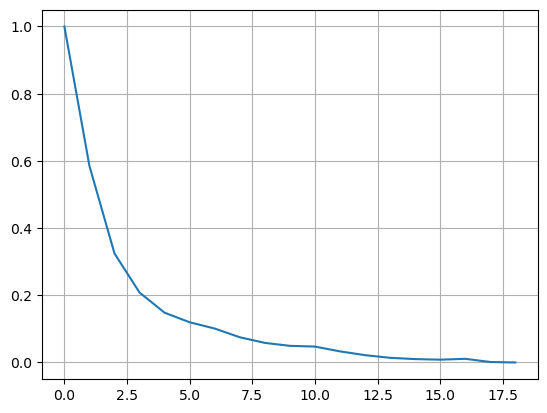

In [179]:
plt.plot(np.arange(len(wcss_scores)), wcss_scores)
plt.savefig("../figs/wcss_scores")
plt.grid(True)

Finding the lowest WCSS Score for the best fit is not usually the correct method, but lets try

In [140]:
np.argmin(wcss_scores)

18

In [162]:
print(f"CircleNames: {len(tg_df['CircleName'].unique())}\n"
      f"RegionNames: {len(tg_df['RegionName'].unique())}\n"
      f"DivisionNames: {len(tg_df['DivisionName'].unique())}\n"
      f"OfficeNames: {len(tg_df['OfficeName'].unique())}\n"
      f"Pincodes: {len(tg_df['Pincode'].unique())}\n"
      f"OfficeTypes: {len(tg_df['OfficeType'].unique())}\n"
      f"Delivery: {len(tg_df['Delivery'].unique())}\n"
      f"StateName: {len(tg_df['StateName'].unique())}")


CircleNames: 1
RegionNames: 2
DivisionNames: 17
OfficeNames: 3425
Pincodes: 638
OfficeTypes: 3
Delivery: 2
StateName: 1


In [180]:
tg_df['OfficeType'].unique()


array(['BO', 'PO', 'HO'], dtype=object)

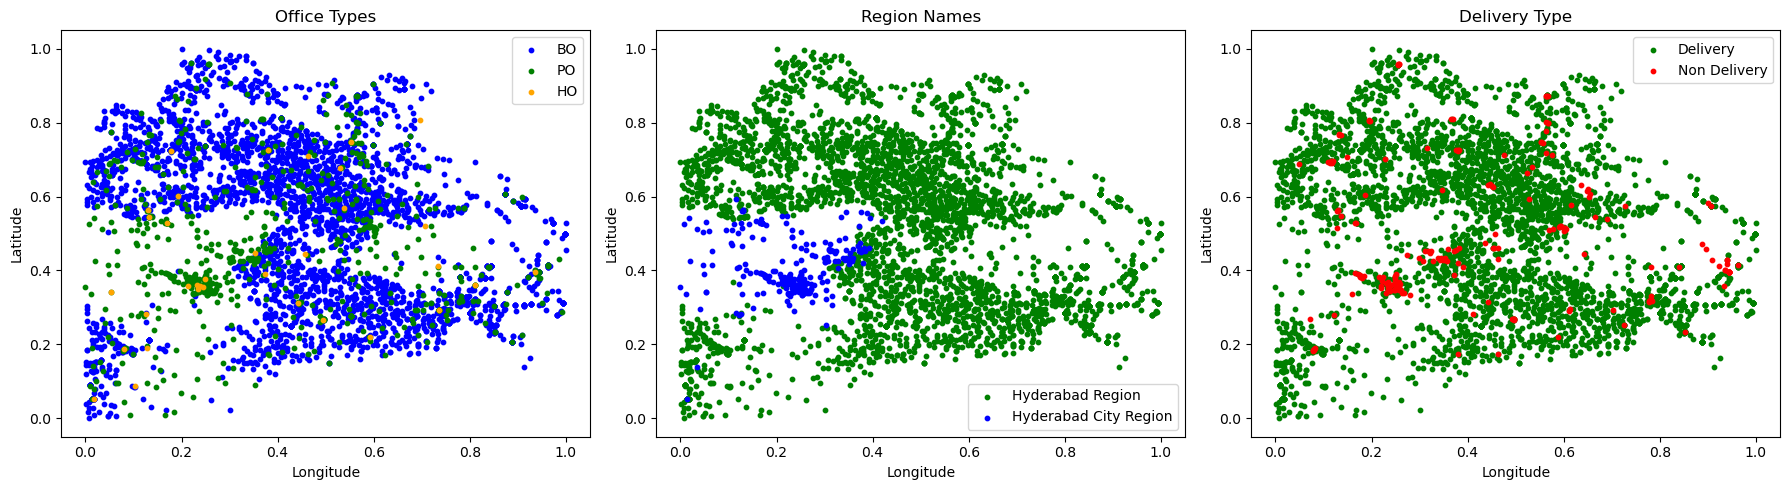

In [181]:
import matplotlib.pyplot as plt
import pandas as pd



# Set up figure
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Office Types
office_colors = {'BO': 'blue', 'PO': 'green', 'HO': 'orange'}
for otype, color in office_colors.items():
    subset = tg_df[tg_df['OfficeType'] == otype]
    axs[0].scatter(subset['Longitude'], subset['Latitude'], color=color, s=10, label=otype)
axs[0].set_title('Office Types')
axs[0].legend()

# RegionName
region_colors = {'Hyderabad Region': 'green', 'Hyderabad City Region': 'blue'}
for region, color in region_colors.items():
    subset = tg_df[tg_df['RegionName'] == region]
    axs[1].scatter(subset['Longitude'], subset['Latitude'], color=color, s=10, label=region)
axs[1].set_title('Region Names')
axs[1].legend()

# Delivery
delivery_colors = {'Delivery': 'green', 'Non Delivery': 'red'}
for delivery, color in delivery_colors.items():
    subset = tg_df[tg_df['Delivery'] == delivery]
    axs[2].scatter(subset['Longitude'], subset['Latitude'], color=color, s=10, label=delivery)
axs[2].set_title('Delivery Type')
axs[2].legend()


for ax in axs:
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


None of these show proper clustering, which give us insights

Hence, the meaningful number of clusters that we can chose lie from 1 to 20 approximately, also, the column **RegionNames** suggests a huge split between the urban and rural areas

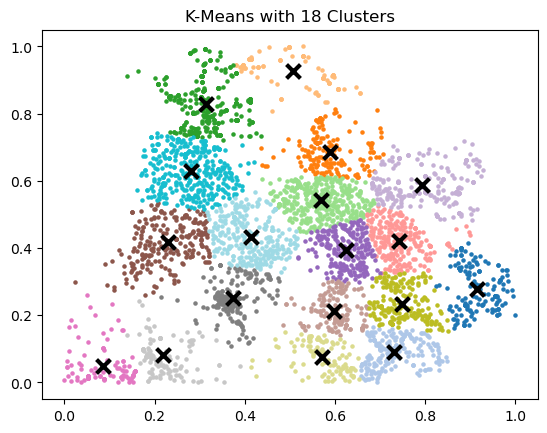

In [165]:
model = K_Means(n_clusters=18)
model.fit(data)

cmap = plt.cm.get_cmap("tab20", model.n_clusters)



# Plot classified points
for i in model.classifications:
    points = np.array(model.classifications[i])
    plt.scatter(points[:, 0], points[:, 1], color=cmap(i), marker="o", s=5)

# Plot centroids
for i in model.centroids:
    plt.scatter(*model.centroids[i], color="k", marker="x", s=100, linewidths=3)

plt.title("K-Means with 18 Clusters")
plt.savefig("../figs/K_Means_18_clusters")
plt.show()


In [142]:
len(tg_df["DivisionName"].unique())

17

We can see that the **WCSS(Within Cluster Sums of Squares)** obtained when we do clustering over **latitudes** and **longitudes** is lowest at $k = 18$ which is close to the number of Divisions in Telangana State

Now, we plot the clusters we obtained using **KMeans** alongside the actual clusters in the telangana data corresponding to clustering the Division Names to see if there is some correlation between them

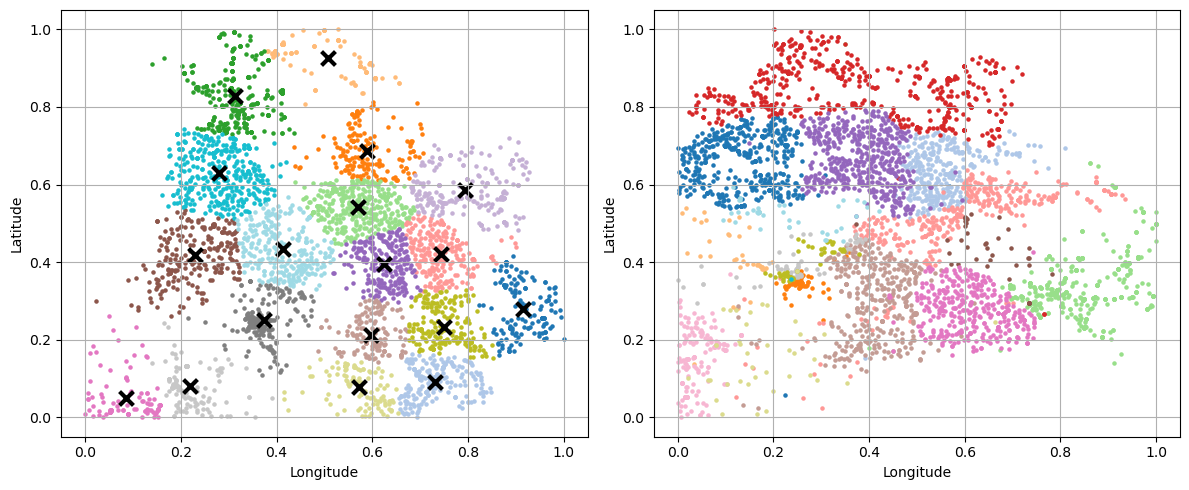

In [178]:

import matplotlib.cm as cm  

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cmap = plt.get_cmap("tab20", model.n_clusters)

# Plot classified points
for i in model.classifications:
    points = np.array(model.classifications[i])
    axes[0].scatter(points[:, 0], points[:, 1], color=cmap(i), marker="o", s=5)

# Plot centroids
for i in model.centroids:
    axes[0].scatter(*model.centroids[i], color="k", marker="x", s=100, linewidths=3)

divisions = tg_df['DivisionName'].unique()
num_divisions = len(divisions)
axes[0].grid(True)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')


colors = plt.get_cmap('tab20', num_divisions)  

# Create a mapping from division to color
division_to_color = {div: colors(i) for i, div in enumerate(divisions)}

# Plot
for div in divisions:
    subset = tg_df[tg_df['DivisionName'] == div]
    axes[1].scatter(
        subset['Longitude'], subset['Latitude'],
        label=div,
        color=division_to_color[div],
        s=5
    )

axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].grid(True)

plt.tight_layout()
plt.savefig("../figs/ClustersvsDivisions")
plt.show()


In [144]:
tg_df["Delivery"].unique()

array(['Delivery', 'Non Delivery'], dtype=object)

We now obtain optimal $k$ between 1-20, to see that if there is correlation of latitudes and longitudes with columns other than `DivisionName`, we simply find "optimal" number of clusters using elbow method.
$$
  k_{\text{opt}} = \operatorname{max}_{i \in N} (w_{i+1} - w_{i}) - (w_{i} - w{i-1})
$$
Where $w$ denotes the wcss scores

In [167]:
def elbow(wcss_scores):
    max_diff = -np.inf
    for score in range(1, len(wcss_scores) - 1):
        slope_diff = (wcss_scores[score + 1] - wcss_scores[score]) - (wcss_scores[score] - wcss_scores[score - 1])
        if slope_diff > max_diff and score != 1:
            max_diff = slope_diff
            best_k = score

    return best_k


In [168]:
optimal_k_elbow = elbow(wcss_scores)
optimal_k_elbow

2

Lets apply KMeans with $k = 2$ and see if we observe anything, also we have seen that there are only two `RegionNames`, lets plot them side by side and see if telangana is distributed naturally

In [174]:
tg_df["Latitude"] =latitudes_scaled
tg_df["Longitude"] = longitudes_scaled

/tmp/ipykernel_706/252204820.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_df_green['Latitude'] = pd.to_numeric(tg_df_green['Latitude'], errors='coerce')
/tmp/ipykernel_706/252204820.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_df_green['Longitude'] = pd.to_numeric(tg_df_green['Longitude'], errors='coerce')
/tmp/ipykernel_706/252204820.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

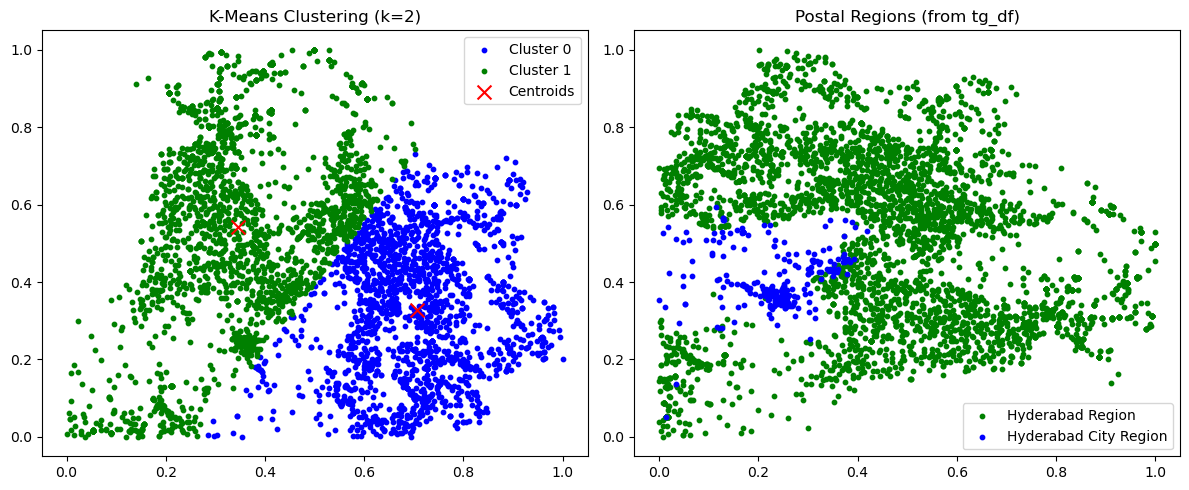

In [176]:

# KMeans with k = 2
model_2k = K_Means(n_clusters=2)
model_2k.fit(data)  

cluster_0 = np.array(model_2k.classifications[0])
cluster_1 = np.array(model_2k.classifications[1])
centroids = model_2k.centroids

#Filtering based on city and non city
tg_df_green = tg_df[tg_df['RegionName'] == 'Hyderabad Region']
tg_df_blue = tg_df[tg_df['RegionName'] == 'Hyderabad City Region']


tg_df_green['Latitude'] = pd.to_numeric(tg_df_green['Latitude'], errors='coerce')
tg_df_green['Longitude'] = pd.to_numeric(tg_df_green['Longitude'], errors='coerce')
tg_df_blue['Latitude'] = pd.to_numeric(tg_df_blue['Latitude'], errors='coerce')
tg_df_blue['Longitude'] = pd.to_numeric(tg_df_blue['Longitude'], errors='coerce')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))


# plotting with kmeans
axs[0].scatter(cluster_0[:, 0], cluster_0[:, 1], color='blue', s=10, label='Cluster 0')
axs[0].scatter(cluster_1[:, 0], cluster_1[:, 1], color='green', s=10, label='Cluster 1')
axs[0].scatter([centroids[0][0], centroids[1][0]],
               [centroids[0][1], centroids[1][1]],
               color='red', marker='x', s=100, label='Centroids')
axs[0].set_title('K-Means Clustering (k=2)')
axs[0].legend()

# RegionName-based coloring
axs[1].scatter(tg_df_green['Longitude'], tg_df_green['Latitude'], color='green', s=10, label='Hyderabad Region')
axs[1].scatter(tg_df_blue['Longitude'], tg_df_blue['Latitude'], color='blue', s=10, label='Hyderabad City Region')
axs[1].set_title('Postal Regions (from tg_df)')
axs[1].legend()


plt.tight_layout()
plt.sa
plt.show()


Looks like even `Hyderabad Region` and `Hyderabad City Region` is not a nice feature, mostly due to human error in encoding the RegionNames

In [151]:
tg_df = tg_df.reset_index(drop=True)
tg_df

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.684554,78.077374
1,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.309656,77.946632
2,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.210820,78.485349
3,Telangana Circle,Hyderabad Region,Nizamabad Division,Malkapur B.O,503125,BO,Delivery,KAMAREDDY,TELANGANA,18.212713,78.549741
4,Telangana Circle,Hyderabad Region,Nizamabad Division,Tujlapur B.O,503125,BO,Delivery,KAMAREDDY,TELANGANA,18.189441,78.547716
...,...,...,...,...,...,...,...,...,...,...,...
3821,Telangana Circle,Hyderabad Region,Nalgonda Division,Valigonda S.O,508112,PO,Delivery,YADADRI BHUVANAGIRI,TELANGANA,17.377222,79.024556
3822,Telangana Circle,Hyderabad City Region,Medak Division,Makkarajpet S.O,502247,PO,Delivery,MEDAK,TELANGANA,17.949361,78.520056
3823,Telangana Circle,Hyderabad City Region,Medak Division,Rajpally S.O,502117,PO,Delivery,MEDAK,TELANGANA,18.019889,78.294944
3824,Telangana Circle,Hyderabad City Region,Medak Division,Toopran S.O,502334,PO,Delivery,MEDAK,TELANGANA,17.905167,78.461083
